In [73]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import country_standardisation as my_cs
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [74]:
df = pd.read_csv('GSEI.csv')
countries = pd.read_csv('data/processing/selected_countries.csv')

In [75]:
url = "https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip"
# world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = gpd.read_file(url)

world['name'] = my_cs.standardise_countries(world['NAME_EN'])
# drop all countries not in 'countries'
# world = world[world['name'].isin(countries['Country'])]
world = world[world['name'] != 'Antarctica']

Using special case for 'Democratic Republic of the Congo' -> 'Congo, Democratic Republic of the'
Using fuzzy match for 'Russia' -> 'Russian Federation'
Using fuzzy match for 'The Bahamas' -> 'Bahamas'
Using fuzzy match for 'Falkland Islands' -> 'Falkland Islands (Malvinas)'
Using fuzzy match for 'French Southern and Antarctic Lands' -> 'Antigua and Barbuda'
Using fuzzy match for 'East Timor' -> 'Timor-Leste'
Using special case for 'Ivory Coast' -> 'Côte d'Ivoire'
Using fuzzy match for 'Palestine' -> 'Palestine, State of'
Using fuzzy match for 'The Gambia' -> 'Gambia'
Using special case for 'Turkey' -> 'Türkiye'
Using fuzzy match for 'Brunei' -> 'Brunei Darussalam'
Using fuzzy match for 'Turkish Republic of Northern Cyprus' -> 'Cyprus'
Using special case for 'Somaliland' -> 'aaa.Unknown'
Country 'Kosovo' not found (best fuzzy match too low: Comoros (46))


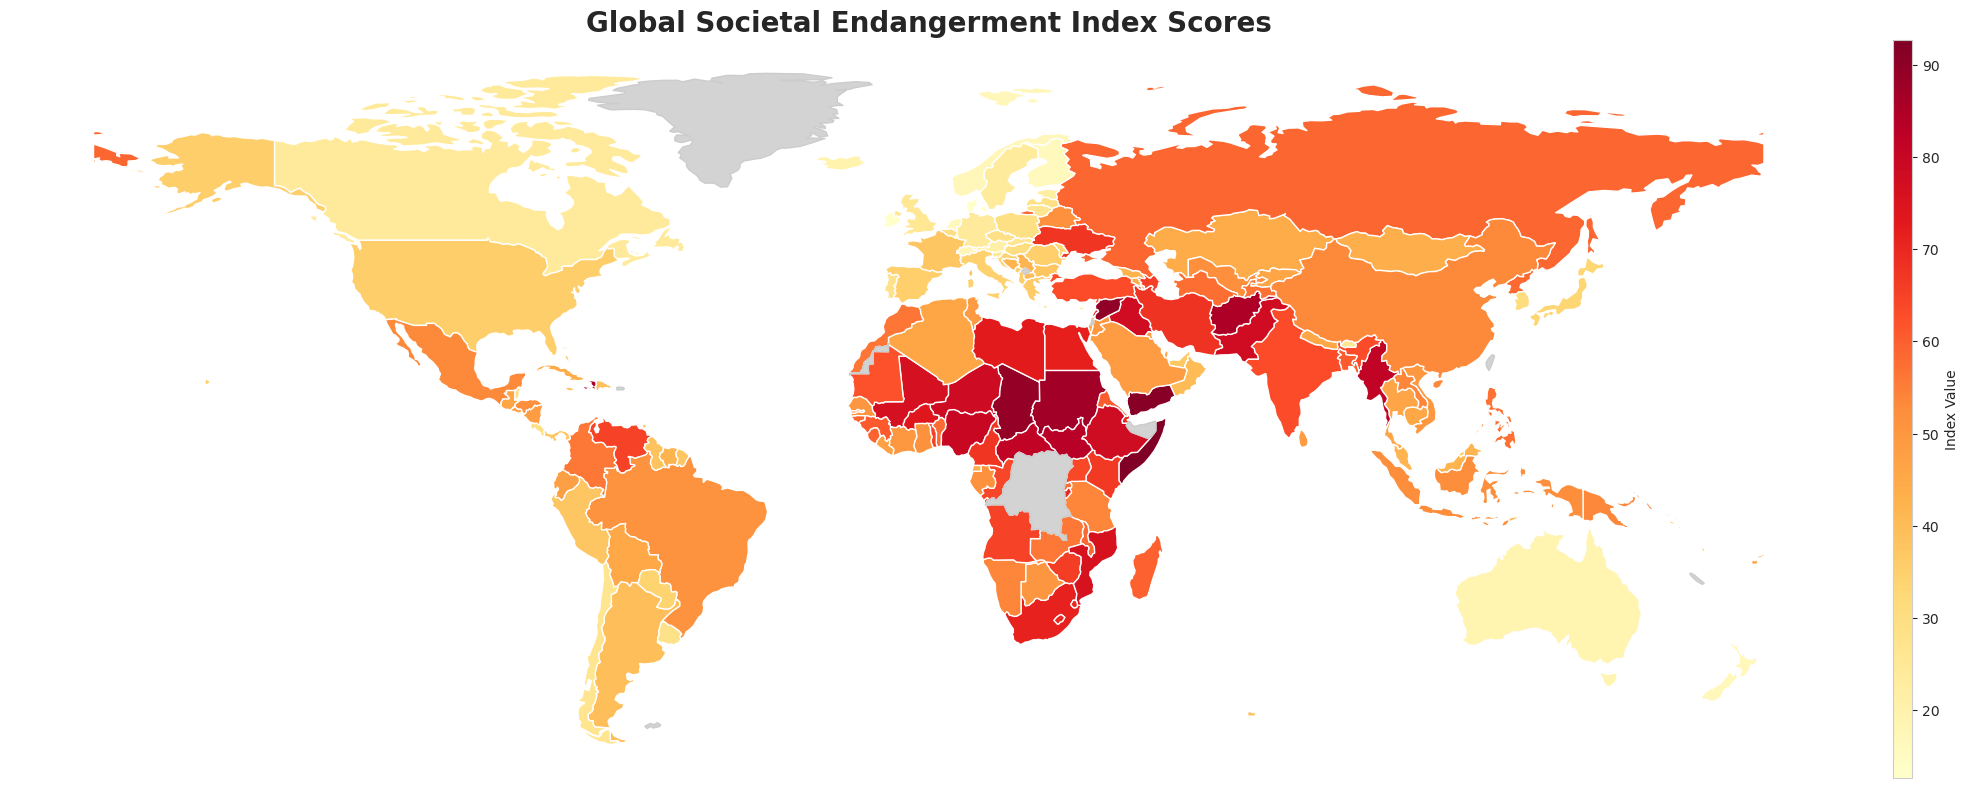

In [103]:
def plot_world_map_gsei(df, gsei_column='GSEI', country_column='Country', title='GSEI', label=None, cmap='YlOrRd'):
    """
    Plots a world map with countries colored based on the 'GSEI' column.
    """
    # 1. Load the world map data
    # url = "https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip"
    # world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
    # world = gpd.read_file(url)

    # 2. Merge your data with the world map data
    merged_data = world.merge(df, left_on='name', right_on=country_column, how='left')
    
    # 3. Plot the map
    fig, ax = plt.subplots(1, 1, figsize=(25, 15))
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="1%", pad=0.1)
    ax.set_axis_off()
    
    merged_data.plot(column=gsei_column, ax=ax, cax=cax, legend=True,
                     cmap=cmap,
                     missing_kwds={
                         "color": "lightgrey",
                         "edgecolor": "0.8",
                         "label": "Missing values",
                     },
                     legend_kwds={
                         "label": label, 
                         "orientation": "vertical",
                     })

    ax.set_title(title, fontsize=20, fontweight='bold')
    plt.show()
    fig.savefig('map.png', dpi=200, bbox_inches='tight')

plot_world_map_gsei(df, gsei_column='GSEI', label='Index Value', title='Global Societal Endangerment Index Scores', cmap='YlOrRd')

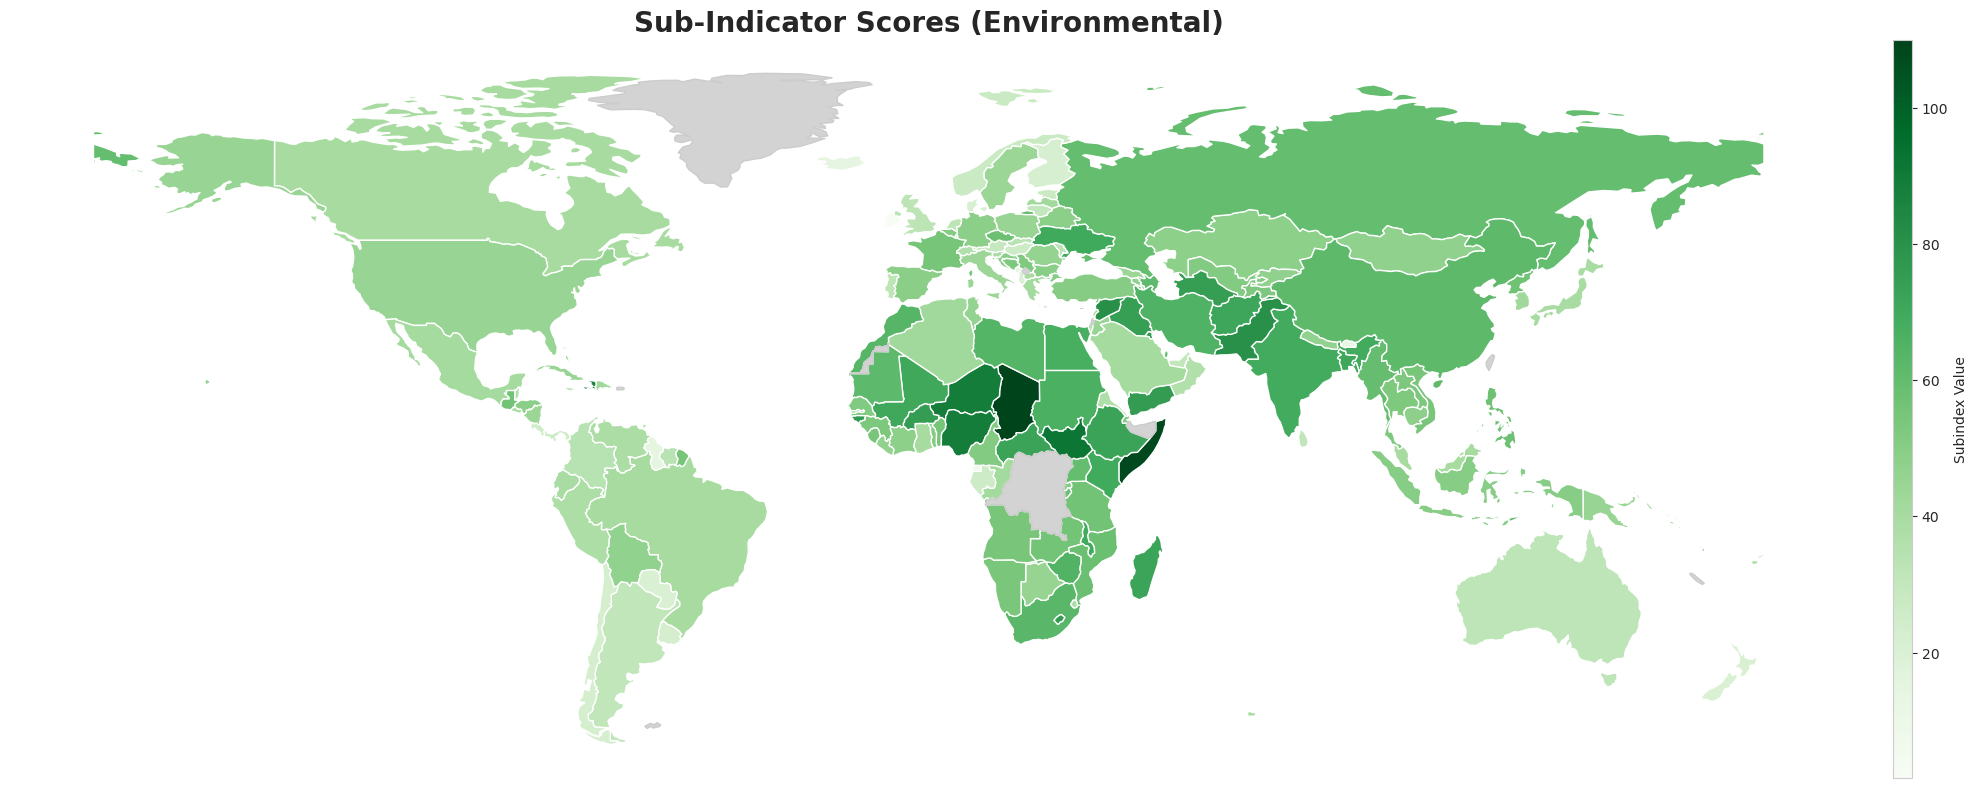

In [104]:
plot_world_map_gsei(df, gsei_column='env', label='Subindex Value', title='Sub-Indicator Scores (Environmental)', cmap='Greens')

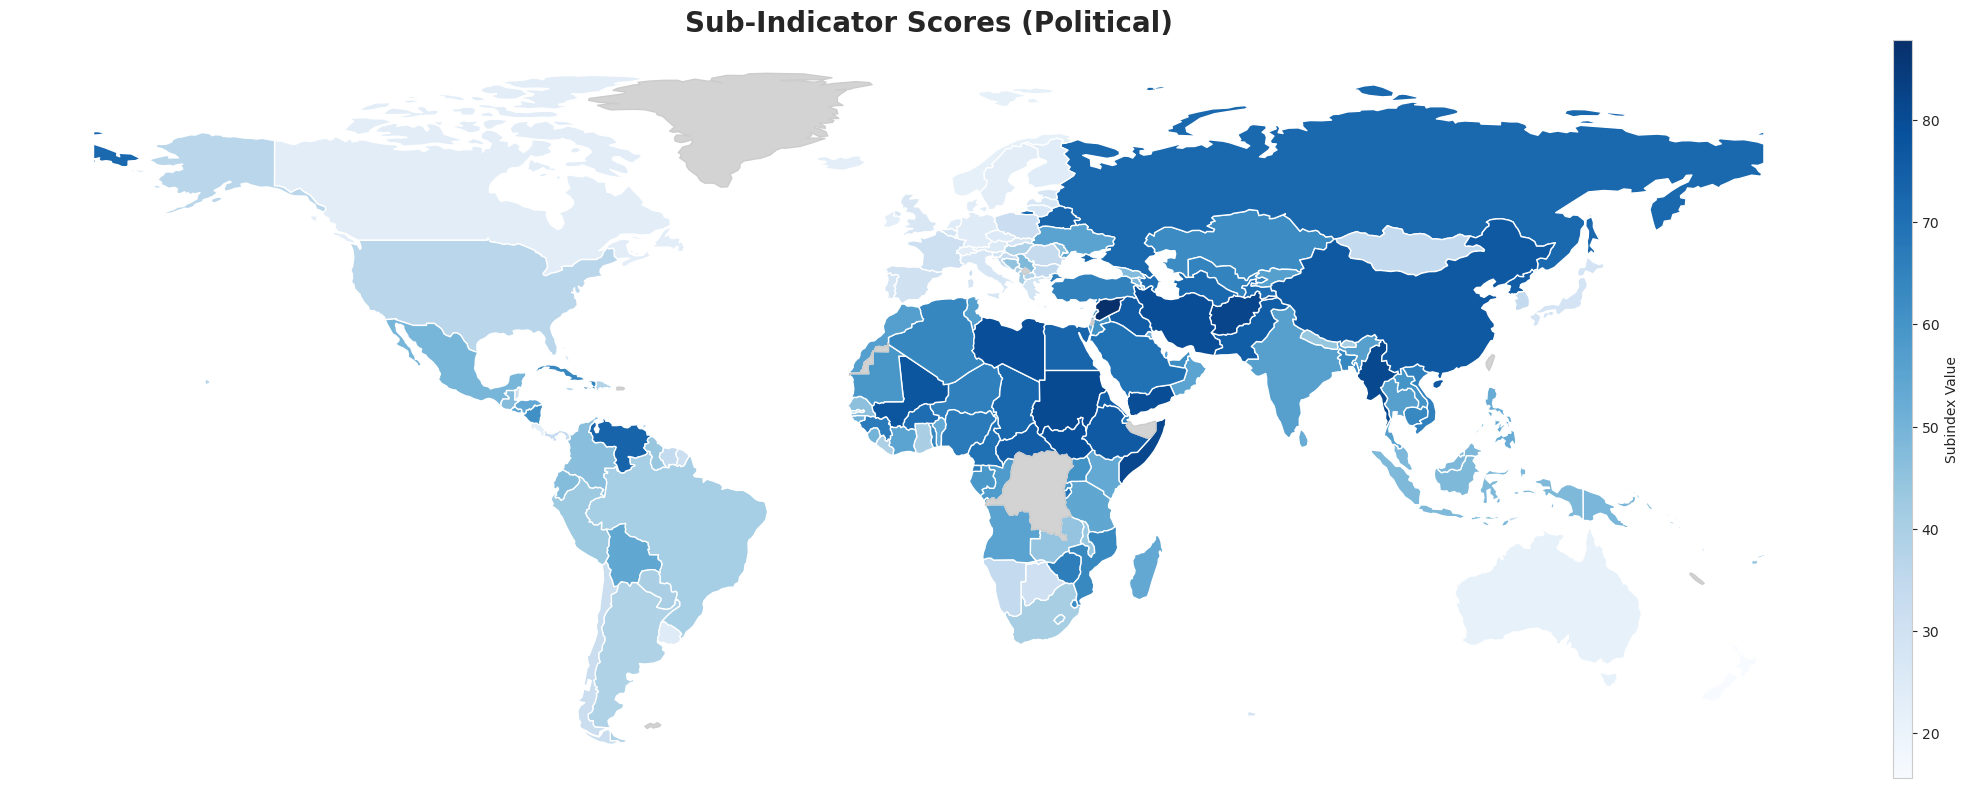

In [105]:
plot_world_map_gsei(df, gsei_column='pol', label='Subindex Value', title='Sub-Indicator Scores (Political)', cmap='Blues')

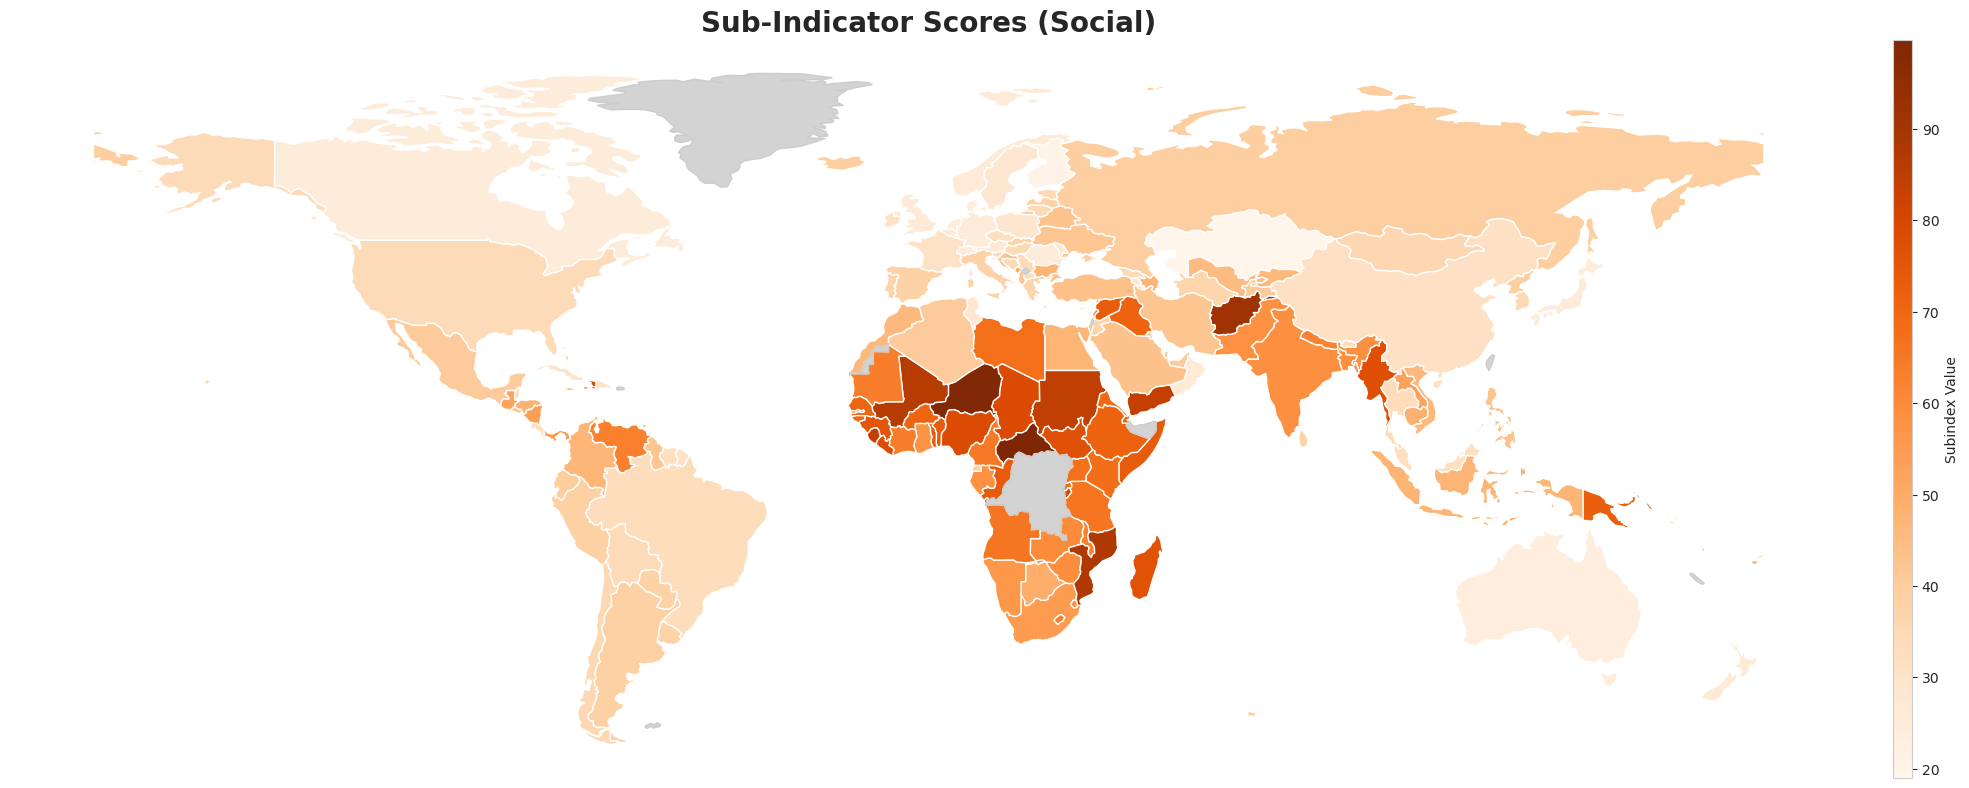

In [106]:
plot_world_map_gsei(df, gsei_column='soc', label='Subindex Value', title='Sub-Indicator Scores (Social)', cmap='Oranges')

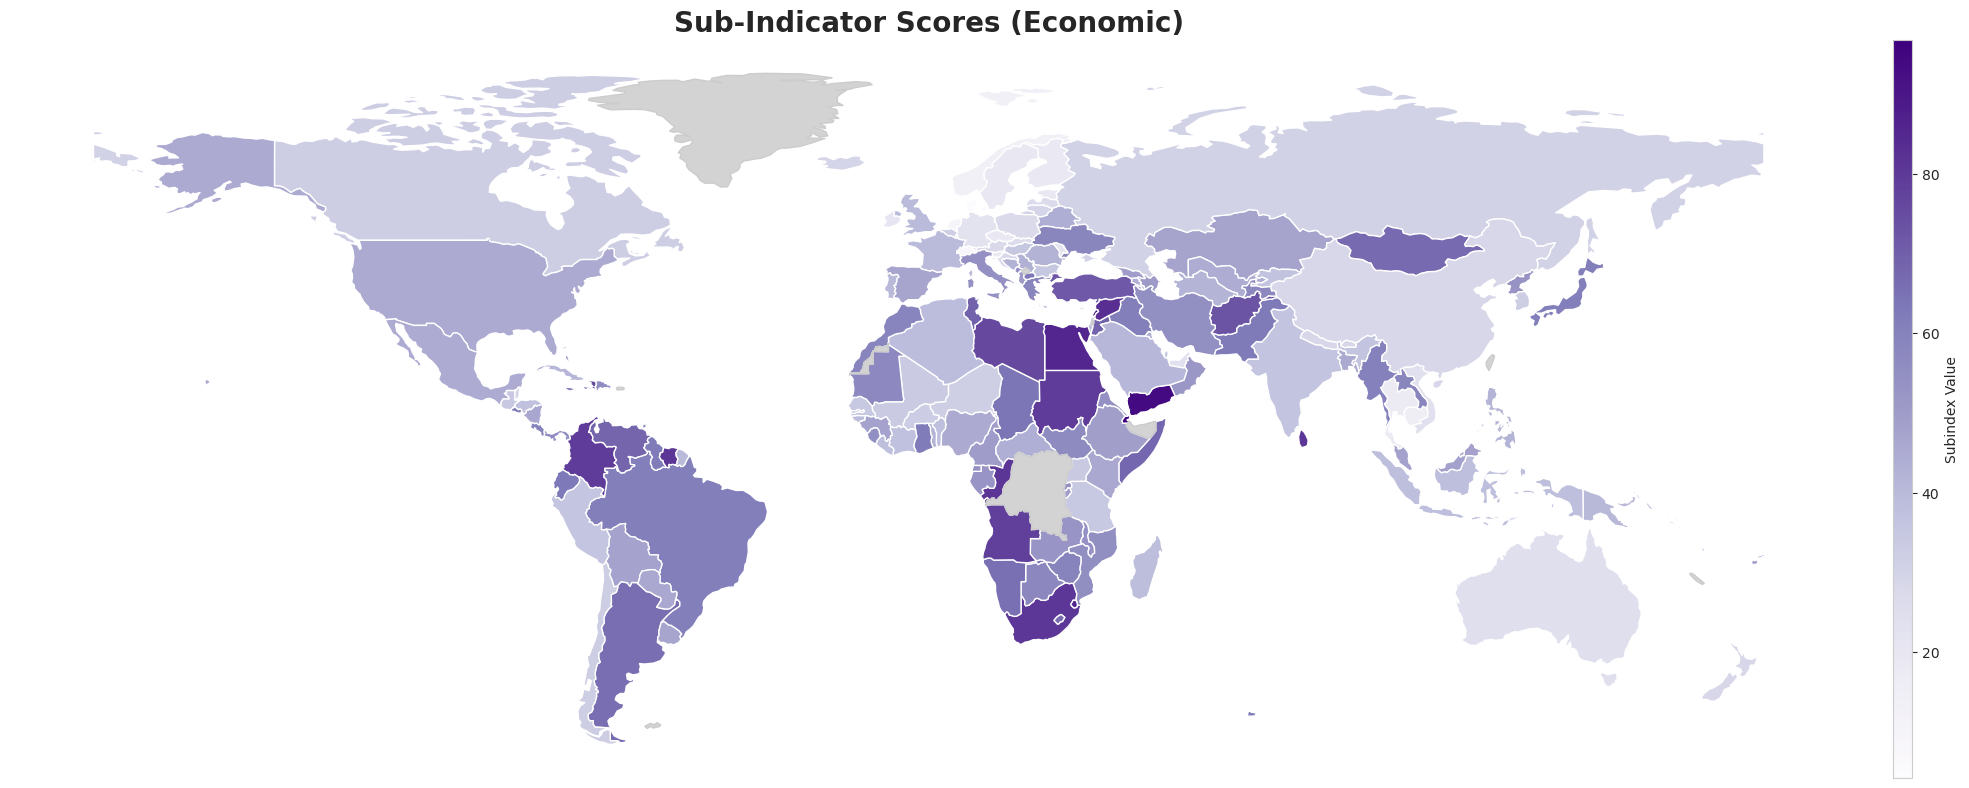

In [107]:
plot_world_map_gsei(df, gsei_column='eco', label='Subindex Value', title='Sub-Indicator Scores (Economic)', cmap='Purples')

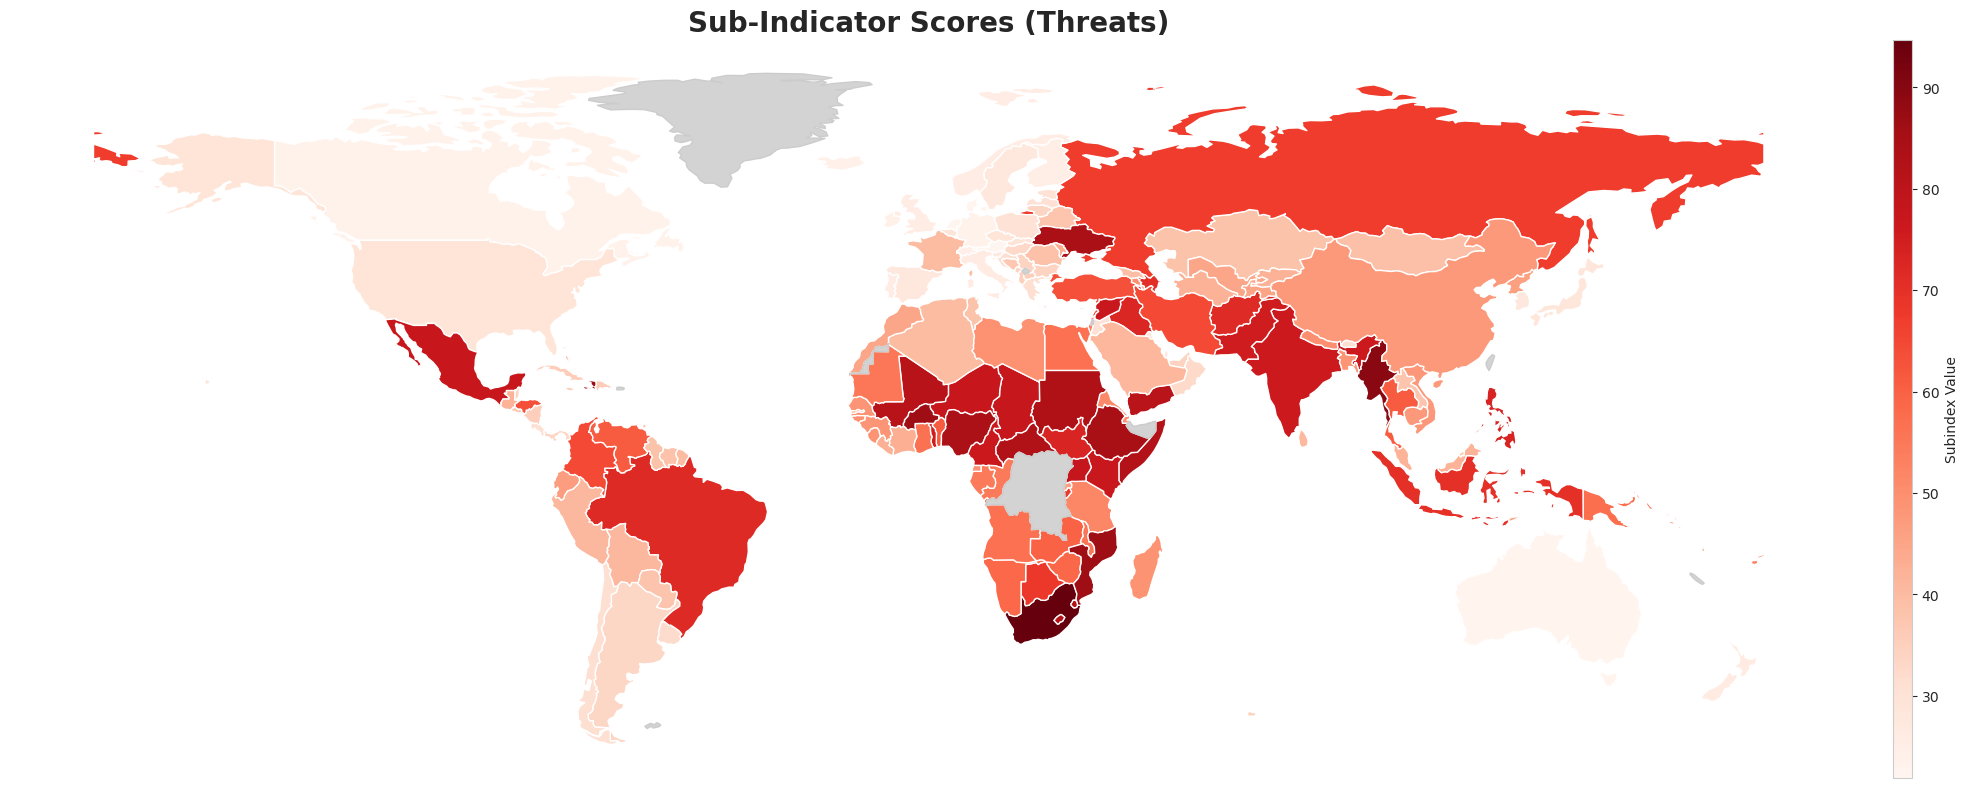

In [108]:
plot_world_map_gsei(df, gsei_column='threat', label='Subindex Value', title='Sub-Indicator Scores (Threats)', cmap='Reds')